In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt

In [2]:
# Sample data
df = pd.read_csv("RawData.csv")
df.columns = df.columns.str.replace('\n', '')
df.replace('-', np.nan, inplace=True)

/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_34302/3741208883.py:2: DtypeWarning: Columns (12,18,19,22,23,24,25,48,59,60,61,77,79,80,81,82,105,106,108,111,114,115,116,117,122,129,132,133,134,135,151) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("RawData.csv")


In [3]:
df.columns

Index(['Project ID', 'Project Name', 'Voluntary Registry', 'ARB/WAProject',
       'Voluntary Status', 'Scope', ' Type', 'Reduction / Removal',
       'Methodology / Protocol', 'Region',
       ...
       '2021.3', '2022.3', '2023.3', 'Notes from Registry',
       'Notes from Berkeley Carbon Trading Project',
       'Added to Database Version - With Data Through', 'star', 'Unnamed: 155',
       '1st issuance yr (no hard code, hide)', 'Ind'],
      dtype='object', length=158)

In [4]:
df = df[['Project ID', 'Project Name', 'Voluntary Registry', 'ARB/WAProject',
       'Voluntary Status', 'Scope', ' Type', 'Reduction / Removal',
       'Methodology / Protocol', 'Region', 'Total Credits Issued',
       'Estimated Annual Emission Reductions', 'Registry / ARB / WA',
       'CCB / Certifications', 'Project Type From the Registry']]

In [5]:
df['Total Credits Issued'] = df['Total Credits Issued'].astype(str)
df['Total Credits Issued'] = df['Total Credits Issued'].str.strip()
df['Total Credits Issued'] = df['Total Credits Issued'].str.replace(',', '').astype(float)
df['Total Credits Issued'].fillna(0, inplace=True)

df['Estimated Annual Emission Reductions'] = df['Estimated Annual Emission Reductions'].astype(str)
df['Estimated Annual Emission Reductions'] = df['Estimated Annual Emission Reductions'].str.replace('-', '0')
df['Estimated Annual Emission Reductions'] = df['Estimated Annual Emission Reductions'].str.strip()
df['Estimated Annual Emission Reductions'] = df['Estimated Annual Emission Reductions'].str.replace(',', '').astype(float)
df['Estimated Annual Emission Reductions'].fillna(0, inplace=True)


/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_34302/3698468210.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Credits Issued'].fillna(0, inplace=True)
/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_34302/3698468210.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [6]:
# Encode categorical variables
cat_features = ['Voluntary Registry', 'Region', 'Registry / ARB / WA']
#cont_features = ['Total Credits Issued', 'Estimated Annual Emission Reductions']
cont_features = ['Estimated Annual Emission Reductions']
text_features = [' Type', 'Methodology / Protocol', 'Project Name', 'Project Type From the Registry']

In [7]:
df_cat = pd.get_dummies(df, columns=cat_features, drop_first=True, dummy_na=True)
df_cat = df_cat.iloc[:, 12:]

In [8]:
df_cat.columns

Index(['Voluntary Registry_CAR', 'Voluntary Registry_GOLD',
       'Voluntary Registry_VCS', 'Voluntary Registry_nan',
       'Region_Eastern Asia', 'Region_Eastern Europe', 'Region_Europe',
       'Region_International', 'Region_Latin America and the Caribbean',
       'Region_North America', 'Region_Northern Africa', 'Region_Oceania',
       'Region_South-Eastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Asia', 'Region_nan',
       'Registry / ARB / WA_ARB', 'Registry / ARB / WA_CAR',
       'Registry / ARB / WA_GOLD', 'Registry / ARB / WA_VCS',
       'Registry / ARB / WA_WA', 'Registry / ARB / WA_nan'],
      dtype='object')

In [9]:
scaler = StandardScaler()
df_cont = scaler.fit_transform(df[['Estimated Annual Emission Reductions']])

In [10]:
# Text vectorization using TF-IDF

tfidf1 = TfidfVectorizer()
df[' Type'].fillna('', inplace=True)
X_text1 = tfidf1.fit_transform(df[' Type'])

tfidf2 = TfidfVectorizer()
df['Methodology / Protocol'].fillna('', inplace=True)
X_text2 = tfidf2.fit_transform(df['Methodology / Protocol'])

tfidf3 = TfidfVectorizer()
df['Project Type From the Registry'].fillna('', inplace=True)
X_text3 = tfidf3.fit_transform(df['Project Type From the Registry'])

/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_34302/2818995313.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' Type'].fillna('', inplace=True)
/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_34302/2818995313.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [11]:
df_cat.head()

,Voluntary Registry_CAR,Voluntary Registry_GOLD,Voluntary Registry_VCS,Voluntary Registry_nan,Region_Eastern Asia,Region_Eastern Europe,Region_Europe,Region_International,Region_Latin America and the Caribbean,Region_North America,...,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Asia,Region_nan,Registry / ARB / WA_ARB,Registry / ARB / WA_CAR,Registry / ARB / WA_GOLD,Registry / ARB / WA_VCS,Registry / ARB / WA_WA,Registry / ARB / WA_nan
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Combine all features
from scipy.sparse import hstack, csr_matrix
X_text = hstack([X_text1, X_text2, X_text3])
X_combined = hstack([df_cont, df_cat, X_text])

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

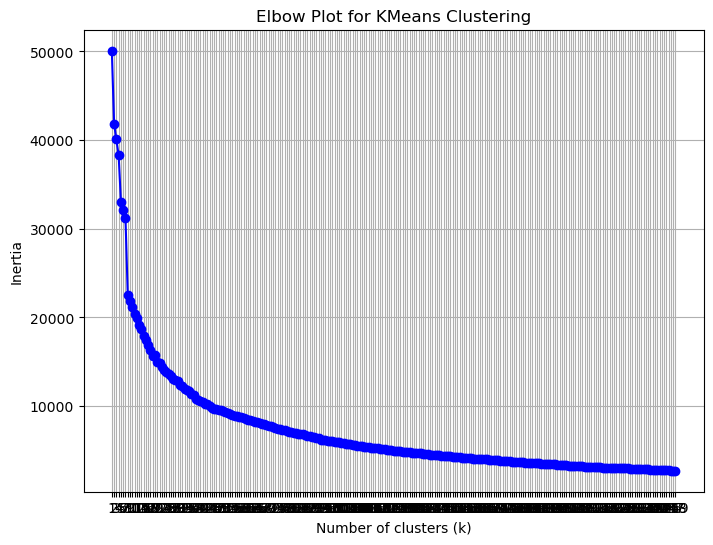

In [14]:
# Range of k values to test
k_range = range(1, 250)
inertia_values = []

# Fit KMeans for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_combined)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [16]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=22, random_state=12)
kmeans.fit(X_combined)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original dataframe
df['K_cluster'] = labels
df.head()


,Project ID,Project Name,Voluntary Registry,ARB/WAProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,Total Credits Issued,Estimated Annual Emission Reductions,Registry / ARB / WA,CCB / Certifications,Project Type From the Registry,K_cluster
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E.: Switch from non-renewable biomass fo...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;07: Affordable ...,Fuel Switching,12
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,Emission reductions through industrial gas sub...,North America,7984006.0,0.0,ACR,NaN,Industrial Gas Substitution,12
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,Anaerobic Digestion,North America,44202.0,0.0,ACR,NaN,Livestock Waste Management,12
3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,12
4,ACR105,Boa Vista A/R,ACR,No,Canceled,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Latin America and the Caribbean,2572210.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,12


In [17]:
labels

array([12, 12, 12, ...,  9, 16, 16], dtype=int32)

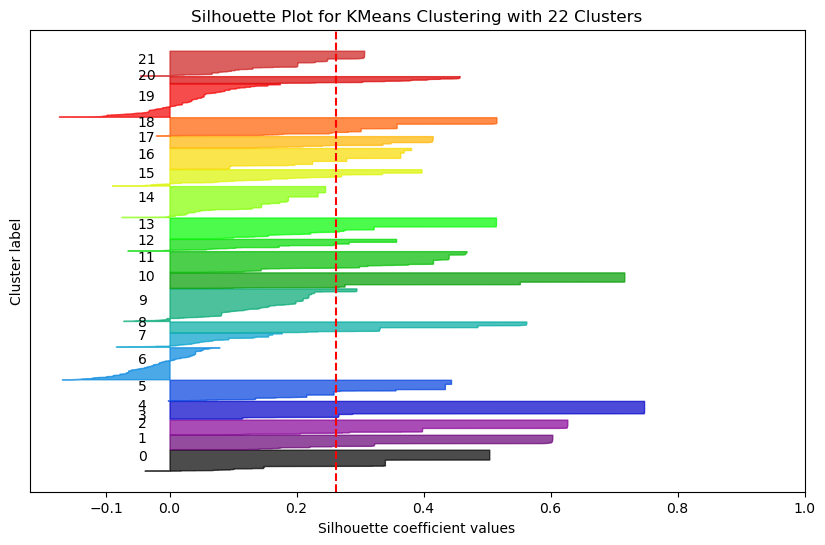

In [18]:
# Create a subplot with 1 row and 1 column
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)

silhouette_avg = silhouette_score(X_combined, labels)
silhouette_values = silhouette_samples(X_combined, labels)

# Compute the silhouette plot
y_lower = 10
for i in range(22):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 22)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("Silhouette Plot for KMeans Clustering with 22 Clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [19]:
df['K_cluster'].value_counts()

K_cluster
19    712
9     698
6     685
14    663
21    534
0     451
13    447
11    445
16    444
5     442
18    394
4     380
15    351
10    332
2     314
1     309
7     301
12    252
17    244
8     231
20    147
3       1
Name: count, dtype: int64

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming `X_combined` is the combined feature matrix from previous steps
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined.toarray())

# Apply DBSCAN
dbscan = DBSCAN(eps=.8, min_samples=80)
dbscan.fit(X_scaled)

# Get cluster labels
labels = dbscan.labels_

# Add cluster labels to the original dataframe
df['DB_cluster'] = labels
df.head()


,Project ID,Project Name,Voluntary Registry,ARB/WAProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,Total Credits Issued,Estimated Annual Emission Reductions,Registry / ARB / WA,CCB / Certifications,Project Type From the Registry,K_cluster,DB_cluster
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E.: Switch from non-renewable biomass fo...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;07: Affordable ...,Fuel Switching,12,-1
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,Emission reductions through industrial gas sub...,North America,7984006.0,0.0,ACR,NaN,Industrial Gas Substitution,12,-1
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,Anaerobic Digestion,North America,44202.0,0.0,ACR,NaN,Livestock Waste Management,12,-1
3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,12,-1
4,ACR105,Boa Vista A/R,ACR,No,Canceled,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Latin America and the Caribbean,2572210.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,12,-1


In [47]:
df['DB_cluster'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22])

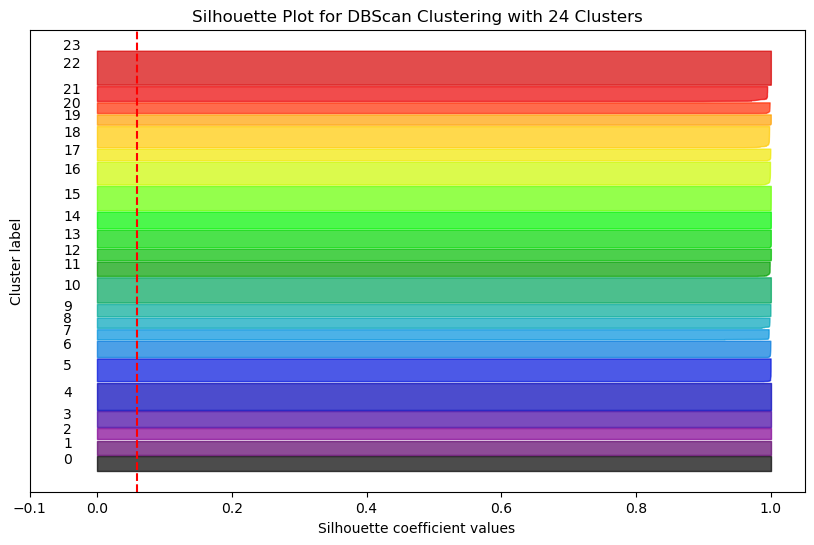

In [48]:
# Create a subplot with 1 row and 1 column
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)

silhouette_avg = silhouette_score(X_scaled, labels)
silhouette_values = silhouette_samples(X_scaled, labels)

# Compute the silhouette plot
y_lower = 10
for i in range(24):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 24)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("Silhouette Plot for DBScan Clustering with 24 Clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [49]:
df['DB_cluster'].value_counts()

DB_cluster
-1     5719
 22     266
 4      212
 10     198
 15     190
 16     179
 5      178
 18     166
 13     138
 14     132
 6      128
 3      124
 21     117
 1      113
 11     113
 0      112
 9       97
 17      92
 12      90
 2       88
 20      84
 19      81
 8       80
 7       80
Name: count, dtype: int64

In [32]:
# Define ranges for eps and min_samples
eps_range = np.arange(0.1, 1.5, 0.1)
min_samples_range = range(40, 80)

best_score = -1
best_params = {}

for eps in eps_range:
    for min_samples in min_samples_range:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_
        print(eps, min_samples)
        
        # Ignore silhouette score for cases where there are noise points only
        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f'Best params: {best_params} with Silhouette Score: {best_score}')

0.1 40
0.1 41
0.1 42
0.1 43
0.1 44
0.1 45
0.1 46
0.1 47
0.1 48
0.1 49
0.1 50
0.1 51
0.1 52
0.1 53
0.1 54
0.1 55
0.1 56
0.1 57
0.1 58
0.1 59
0.1 60
0.1 61
0.1 62
0.1 63
0.1 64
0.1 65
0.1 66
0.1 67
0.1 68
0.1 69
0.1 70
0.1 71
0.1 72
0.1 73
0.1 74
0.1 75
0.1 76
0.1 77
0.1 78
0.1 79
0.2 40
0.2 41
0.2 42
0.2 43
0.2 44
0.2 45
0.2 46
0.2 47
0.2 48
0.2 49
0.2 50
0.2 51
0.2 52
0.2 53
0.2 54
0.2 55
0.2 56
0.2 57
0.2 58
0.2 59
0.2 60
0.2 61
0.2 62
0.2 63
0.2 64
0.2 65
0.2 66
0.2 67
0.2 68
0.2 69
0.2 70
0.2 71
0.2 72
0.2 73
0.2 74
0.2 75
0.2 76
0.2 77
0.2 78
0.2 79
0.30000000000000004 40
0.30000000000000004 41
0.30000000000000004 42
0.30000000000000004 43
0.30000000000000004 44
0.30000000000000004 45
0.30000000000000004 46
0.30000000000000004 47
0.30000000000000004 48
0.30000000000000004 49
0.30000000000000004 50
0.30000000000000004 51
0.30000000000000004 52
0.30000000000000004 53
0.30000000000000004 54
0.30000000000000004 55
0.30000000000000004 56
0.30000000000000004 57
0.30000000000000004 58
0.3

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming `X_combined` is the combined feature matrix from previous steps
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined.toarray())

# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=40)
dbscan.fit(X_scaled)

# Get cluster labels
labels = dbscan.labels_

# Add cluster labels to the original dataframe
df['DB_cluster'] = labels
df.head()

,Project ID,Project Name,Voluntary Registry,ARB/WAProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,Total Credits Issued,Estimated Annual Emission Reductions,Registry / ARB / WA,CCB / Certifications,Project Type From the Registry,K_cluster,DB_cluster
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E.: Switch from non-renewable biomass fo...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;07: Affordable ...,Fuel Switching,12,-1
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,Emission reductions through industrial gas sub...,North America,7984006.0,0.0,ACR,NaN,Industrial Gas Substitution,12,-1
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,Anaerobic Digestion,North America,44202.0,0.0,ACR,NaN,Livestock Waste Management,12,-1
3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,12,-1
4,ACR105,Boa Vista A/R,ACR,No,Canceled,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Latin America and the Caribbean,2572210.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,12,-1


In [51]:
df['DB_cluster'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52])

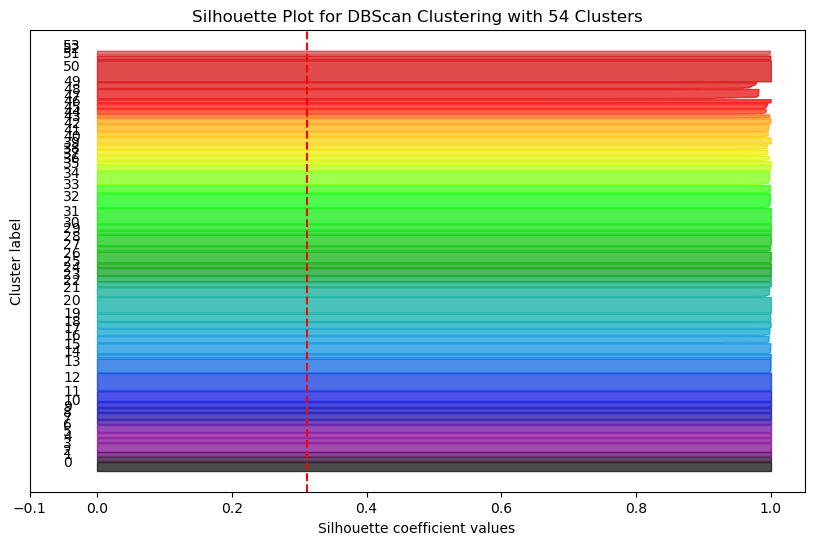

In [52]:
# Create a subplot with 1 row and 1 column
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)

silhouette_avg = silhouette_score(X_scaled, labels)
silhouette_values = silhouette_samples(X_scaled, labels)

# Compute the silhouette plot
y_lower = 10
for i in range(54):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 54)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("Silhouette Plot for DBScan Clustering with 54 Clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [38]:
df['DB_cluster'].value_counts()

DB_cluster
-1     4010
 50     266
 12     212
 20     198
 31     190
 32     179
 13     178
 34     166
 26     138
 28     132
 15     128
 11     124
 48     118
 21     113
 3      113
 0      112
 19      97
 33      92
 24      90
 6       88
 42      85
 40      81
 17      80
 16      80
 8       77
 18      76
 49      76
 30      73
 46      66
 23      65
 10      64
 35      64
 38      63
 9       63
 43      63
 5       62
 41      60
 27      59
 37      58
 39      56
 22      55
 1       55
 45      54
 25      51
 51      50
 52      50
 7       47
 14      45
 4       45
 2       44
 36      42
 29      42
 44      41
 47      41
Name: count, dtype: int64

In [53]:
df['DB_cluster'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52])

In [54]:
df['K_cluster'].unique()

array([12,  5, 16,  7,  0,  2,  8, 17, 14, 15,  6, 18, 10, 13, 21,  9,  1,
       19, 11,  4, 20,  3], dtype=int32)

In [57]:
df.to_csv("clustered_out.csv")

In [72]:
df[df[' Type']=='Energy Efficiency'].shape

(27, 17)

In [71]:
df[df[' Type']=='Bundled Energy Efficiency'].shape

(154, 17)

In [73]:
df.shape

(8777, 17)